In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import site
import numpy as np
import pandas as pd

# Introduction

Similar to illustris_python, we install and load our module from a directory. 

In [2]:
site.addsitedir('/mnt/home/agabrielpillai/github/') 
import illustris_sam as ilsam

First, we specify the basepath to the simulation.

In [6]:
basePath = '/mnt/ceph/users/agabrielpillai/camels_sam/hdf5/CV/CV_0/'

The header will give us some basic information about the subvolume we are working with. 

In [7]:
header = ilsam.groupcat.load_header(basePath, [0, 0, 0], 'subvolume')
header.keys()

dict_keys(['Ngroups_ThisFile', 'Nsubgroups_ThisFile', 'Nsubvolumes', 'Ngroups_ThisFile_Redshift', 'Nsubgroups_ThisFile_Redshift', 'Redshifts'])

For example, we can look at how many subhalos are in this file in total and split up by snapshot.

In [8]:
header['Nsubgroups_ThisFile'], header['Nsubgroups_ThisFile_Redshift']

(1716203,
 array([    0,     0,     0,     2,    10,    26,    48,    98,   176,
          319,   516,   784,  1204,  1741,  2313,  2901,  3630,  4553,
         5531,  6586,  7639,  8815,  9951, 11246, 12543, 13583, 14722,
        15561, 16401, 17188, 17860, 18518, 19050, 19571, 20028, 20436,
        20717, 21014, 21260, 21432, 21767, 21788, 21986, 22088, 22286,
        22400, 22513, 22609, 22662, 22709, 22809, 22810, 22881, 22948,
        22956, 22951, 22962, 22983, 22976, 22932, 22923, 22901, 22895,
        22905, 22879, 22869, 22861, 22823, 22846, 22848, 22840, 22845,
        22858, 22857, 22833, 22799, 22776, 22766, 22787, 22683, 22679,
        22670, 22676, 22630, 22640, 22580, 22552, 22540, 22546, 22534,
        22493, 22431, 22408, 22369, 22340, 22320, 22283, 22249, 22237,
        22243]))

# Group (Haloprop) and Subhalo (Galprop) Catalogs

## Loading Individual Subvolumes

If you want to load a subvolume's full galprop or haloprop, it can be easily done as shown below. Omitting the fields argument means that you are choosing to load all fields. 

In [9]:
SAM_subhalos = ilsam.groupcat.load_galprop(basePath, [0, 0, 0])
SAM_halos = ilsam.groupcat.load_haloprop(basePath, [0, 0, 0], fields=None)

SAM_subhalos.keys(), SAM_halos.keys()

(dict_keys(['GalpropBirthHaloID', 'GalpropHaloIndex', 'GalpropMBH', 'GalpropMH2', 'GalpropMHI', 'GalpropMHII', 'GalpropMaccdot_bright', 'GalpropMaccdot_radio', 'GalpropMbulge', 'GalpropMcold', 'GalpropMstar', 'GalpropMstar_merge', 'GalpropMstrip', 'GalpropMu_merger', 'GalpropMvir', 'GalpropOutflowRate_Mass', 'GalpropOutflowRate_Metal', 'GalpropPos', 'GalpropRbulge', 'GalpropRdisk', 'GalpropRedshift', 'GalpropRfric', 'GalpropRhalo', 'GalpropRootHaloID', 'GalpropSatType', 'GalpropSfr', 'GalpropSfrave_100myr', 'GalpropSfrave_1gyr', 'GalpropSfrave_20myr', 'GalpropSigmaBulge', 'GalpropSnapNum', 'GalpropTmerger', 'GalpropTmerger_major', 'GalpropTsat', 'GalpropVdisk', 'GalpropVel', 'GalpropZcold', 'GalpropZstar']),
 dict_keys(['HalopropC_nfw', 'HalopropHaloID', 'HalopropIndex', 'HalopropMaccdot_metal', 'HalopropMaccdot_pristine', 'HalopropMaccdot_radio', 'HalopropMaccdot_reaccreate', 'HalopropMaccdot_reaccreate_metal', 'HalopropMass_ejected', 'HalopropMcooldot', 'HalopropMdot_eject', 'Halopro

In [10]:
ilsam.groupcat.load_galprop(basePath, [0, 0, 0], fields=['GalpropHaloIndex'], matches=False)


{'GalpropHaloIndex': array([     24,      25,      26, ..., 3291435, 3291436, 3291437],
       dtype=uint32)}

In [11]:
ilsam.groupcat.load_haloprop(basePath, [0, 0, 0], fields=['HalopropIndex'], matches=False)


{'HalopropIndex': array([      0,       1,       2, ..., 3291435, 3291436, 3291437],
       dtype=uint32)}

## Loading Snapshots

Loading a snapshot is not so complicated either. The arguements you have to supply are the snapshot and subvolumes you are querying. You can query as many / as little subvolumes you want or have available.

In [13]:
SAM_halos_99 = ilsam.groupcat.load_snapshot_halos(basePath, 99, [[0, 0, 0], [0, 1, 1]], fields=['HalopropMvir', 'HalopropC_nfw', 'HalopropIndex_Snapshot'])
SAM_halos_99

{'HalopropMvir': array([ 40.6407, 176.163 ,  46.27  , ...,  31.8866,  37.6686,  36.4161],
       dtype=float32),
 'HalopropC_nfw': array([15.5603, 19.5978, 23.5914, ..., 11.6474, 22.7271, 24.3066],
       dtype=float32),
 'HalopropIndex_Snapshot': array([    0,     1,     2, ..., 68563, 68564, 68565], dtype=int32),
 'HalopropSnapNum': array([99., 99., 99., ..., 99., 99., 99.], dtype=float32),
 'n_items': 31672}

An example of utilizing all 8 subvolumes in CAMELS-SAM CV 0...

In [14]:
def genFullSubvolumes(n):
    subvolume_list = []

    for i in range(n):
        for j in range(n):
            for k in range(n):
                subvolume_list.append([i, j, k])

    return subvolume_list

In [15]:
SAM_subhalos_99 = ilsam.groupcat.load_snapshot_subhalos(basePath, 99, genFullSubvolumes(2), 
                                                        fields=['GalpropHaloIndex_Snapshot', 'GalpropMvir', 'GalpropMstar', 'GalpropSatType', 'GalpropPos'])
SAM_halos_99 = ilsam.groupcat.load_snapshot_halos(basePath, 99, genFullSubvolumes(2), 
                                                  fields=['HalopropIndex_Snapshot', 'HalopropMvir'])

In [16]:
SAM_subhalos_99

{'GalpropHaloIndex_Snapshot': array([     0,      1,      2, ..., 125360, 125361, 125362], dtype=int32),
 'GalpropMvir': array([ 40.6407, 176.163 ,  46.27  , ...,  35.7938, 517.715 ,  37.6686],
       dtype=float32),
 'GalpropMstar': array([ 0.11305  ,  1.69098  ,  0.120371 , ...,  0.036397 , 18.3593   ,
         0.0249875], dtype=float32),
 'GalpropSatType': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'GalpropPos': array([[ 16.2942  ,   0.529569,  14.9236  ],
        [ 15.9194  ,   0.186197,  14.5543  ],
        [ 16.4842  ,   0.324018,  14.629   ],
        ...,
        [125.45    , 142.616   , 127.312   ],
        [143.363   , 134.615   , 147.605   ],
        [119.944   , 147.623   , 133.307   ]], dtype=float32),
 'GalpropSnapNum': array([99., 99., 99., ..., 99., 99., 99.], dtype=float32),
 'n_items': 165114}

We can easily store our data as a pandas dataframe...

In [17]:
def genGalpropDF(SAM_subhalos):
    galprop = pd.DataFrame()
    galprop['haloprop-idx'] = SAM_subhalos['GalpropHaloIndex_Snapshot']
    galprop['mhalo'] = SAM_subhalos['GalpropMvir']
    galprop['mstar'] = SAM_subhalos['GalpropMstar']
    galprop['sat_type'] = SAM_subhalos['GalpropSatType']
    galprop['x'] = SAM_subhalos['GalpropPos'][:, 0]
    galprop['y'] = SAM_subhalos['GalpropPos'][:, 1]
    galprop['z'] = SAM_subhalos['GalpropPos'][:, 2]
    return galprop 

def genHalopropDF(SAM_halos):
    haloprop = pd.DataFrame()
    haloprop['idx'] = SAM_halos['HalopropIndex_Snapshot']
    haloprop['mvir'] = SAM_halos['HalopropMvir']
    return haloprop

In [18]:
galprop = genGalpropDF(SAM_subhalos_99)
haloprop = genHalopropDF(SAM_halos_99)

Obtain the centrals by filtering...

In [19]:
galprop_cen = galprop[galprop['sat_type'] == 0]

... and plot accordingly!

(6.0, 12.5)

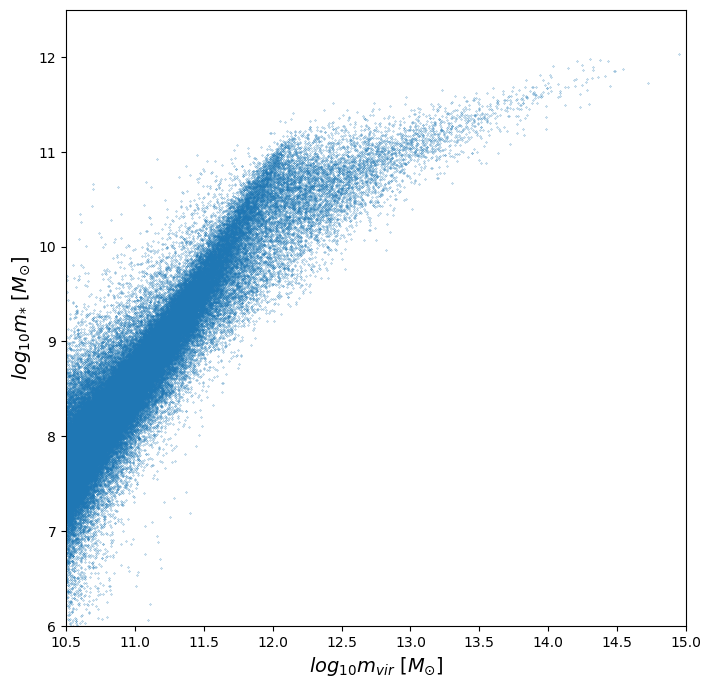

In [20]:
plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(np.log10(galprop_cen['mhalo'] * 1e9), np.log10(galprop_cen['mstar'] * 1e9), s = 0.05)
plt.xlabel('$log_{10} m_{vir}$ [$M_{\odot}$]', fontsize=14)
plt.xlim(10.5, 15)
plt.ylabel('$log_{10} m_{*}$ [$M_{\odot}$]', fontsize=14)
plt.ylim(6, 12.5)

# Loading Different Boxes

Our TNG-SAM catalogs also include catalogs for the TNG300 and TNG50 boxes. To utilize them, you have to set up your directory in the same manner as TNG100 and create basePaths for the two other volumes. (Loading TNG300 takes a large amount of resources. To properly utilize, experiment on smaller sets of subvolumes first). 

In [25]:
basePath300 = '/mnt/ceph/users/agabrielpillai/tng-sam/L205n2500TNG/'
basePath50 = '/mnt/ceph/users/agabrielpillai/tng-sam/L35n2160TNG/'

fields=['GalpropHaloIndex', 'GalpropMhalo', 'GalpropMstar', 'GalpropSatType']

subhalos_99_300 = ilsam.groupcat.load_snapshot_subhalos(basePath300, 99, genFullSubvolumes(7), fields=fields)
subhalos_99_50 = ilsam.groupcat.load_snapshot_subhalos(basePath50, 99, genFullSubvolumes(6), fields=fields)

In [26]:
def genGalpropDF(SAM_subhalos):
    galprop = pd.DataFrame()
    galprop['mhalo'] = SAM_subhalos['GalpropMhalo']
    galprop['mstar'] = SAM_subhalos['GalpropMstar']
    galprop['sat_type'] = SAM_subhalos['GalpropSatType']
    return galprop 

In [27]:

galprop_50 = genGalpropDF(subhalos_99_50)
galprop_300 = genGalpropDF(subhalos_99_300)

galprop_50 = galprop_50[galprop_50['sat_type'] == 0].reset_index(drop=True)
galprop_300 = galprop_300[galprop_300['sat_type'] == 0].reset_index(drop=True)

/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


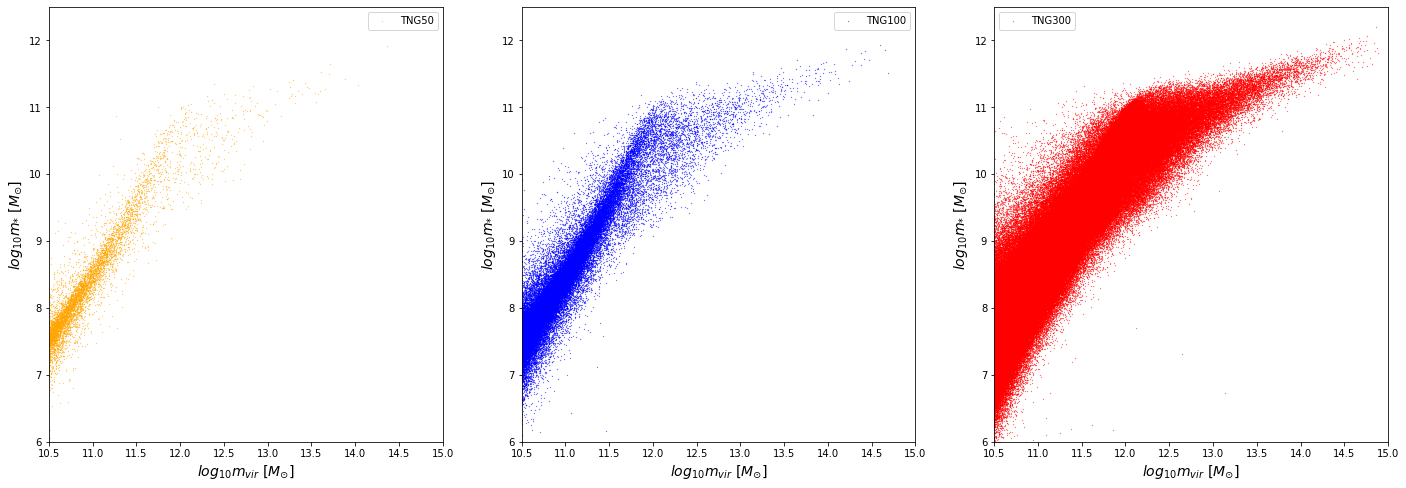

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(24, 8))
ax[0].scatter(np.log10(galprop_50['mhalo'] * 1e9), np.log10(galprop_50['mstar'] * 1e9), s = 0.05, c='orange', label='TNG50')
ax[1].scatter(np.log10(galprop['mhalo'] * 1e9), np.log10(galprop['mstar'] * 1e9), s = 0.05, c='blue', label='TNG100')
ax[2].scatter(np.log10(galprop_300['mhalo'] * 1e9), np.log10(galprop_300['mstar'] * 1e9), s = 0.05, c='red', label='TNG300')

for i in range(0, 3):
    ax[i].set_xlabel('$log_{10} m_{vir}$ [$M_{\odot}$]', fontsize=14)
    ax[i].set_ylabel('$log_{10} m_{*}$ [$M_{\odot}$]', fontsize=14)
    ax[i].set_xlim(10.5, 15)
    ax[i].set_ylim(6, 12.5)
    ax[i].legend()